<a href="https://colab.research.google.com/github/Umang233/Machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [84]:
df=pd.read_csv("https://raw.githubusercontent.com/Umang233/Dataset/main/NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [85]:
df.head(1)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506


In [86]:
data=df[["daily","sunday"]]

In [87]:
data

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [88]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [89]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

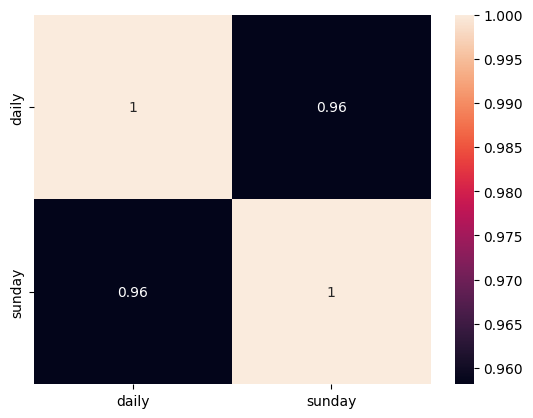

In [90]:
sns.heatmap(data.corr(),annot=True)

In [91]:
#visulation

<ipython-input-92-c665491b3fd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["daily"])


<Axes: xlabel='daily', ylabel='Density'>

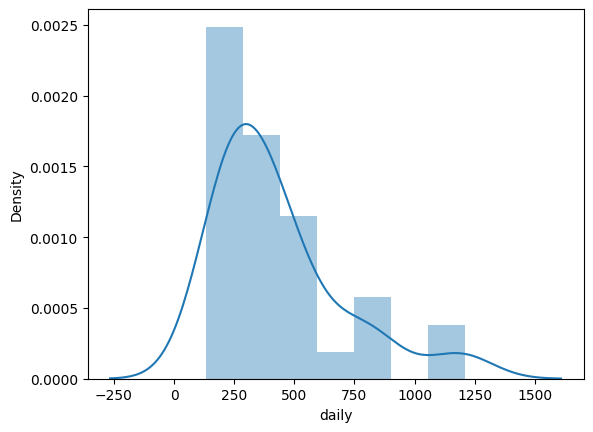

In [92]:
sns.distplot(data["daily"])

<ipython-input-93-03e301becc6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sunday"])


<Axes: xlabel='sunday', ylabel='Density'>

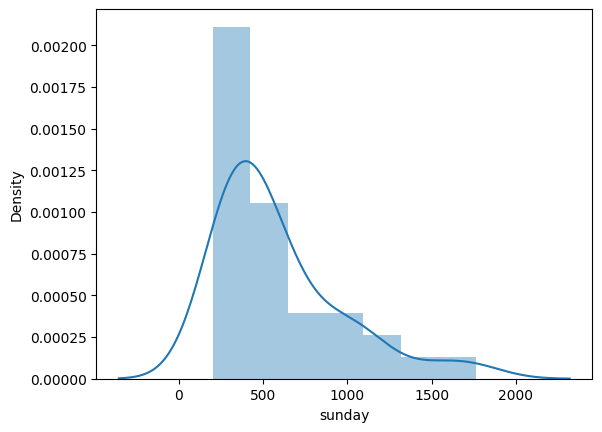

In [93]:
sns.distplot(df["sunday"])

In [94]:
import statsmodels.formula.api as smf

In [95]:
model=smf.ols("sunday~daily",data=data).fit()

In [96]:
model

In [97]:
#model parameter
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [98]:
x=838.902
y=1.33*x+13.83

In [99]:
x


838.902

In [100]:
y

1129.56966

In [101]:
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

In [102]:
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [103]:
model.rsquared

0.9180596895873295

In [104]:
newdf=pd.DataFrame({"daily":[960,980,924,124]})

In [105]:
model.predict(newdf)

0    1299.961797
1    1326.756092
2    1251.732066
3     179.960260
dtype: float64

In [106]:
data["log_d"]=np.log(data["daily"])
data["log_s"]=np.log(data["sunday"])

In [107]:
data

,daily,sunday,log_d,log_s
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


In [108]:
model1=smf.ols("log_s~log_d",data=data).fit

In [109]:
data["log_s"].skew()

0.5337572087816101

In [110]:
data["log_d"].skew()

0.4682202000020356

In [111]:
data["sqrt_d"]=np.sqrt(data["daily"])
data["sqrt_s"]=np.sqrt(data["sunday"])

In [112]:
data


,daily,sunday,log_d,log_s,sqrt_d,sqrt_s
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


In [113]:
data["sqrt_s"].skew()

1.0392935145699538

In [114]:
data["sqrt_d"].skew()

1.0075247084922163

new data set

In [115]:
df1=pd.read_csv("https://raw.githubusercontent.com/Umang233/Dataset/main/WC_AT.csv")

In [116]:
df1

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [117]:
model2=smf.ols("AT~Waist",data=df1).fit()

In [118]:
model2.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [119]:
newf=pd.DataFrame({"Waist":[960,980,924,124]})

In [120]:
model2.predict(newf)

0    3104.523528
1    3173.700716
2    2980.004590
3     212.917077
dtype: float64

In [121]:
#new data

In [122]:
df2=pd.read_csv("https://raw.githubusercontent.com/Aman240499/DS-Assignments/main/student_scores%20-%20student_scores.txt")

df2

In [123]:
df2

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [124]:
model3=smf.ols("Scores~Hours",data=df2).fit()
print(model3.params)
model3.rsquared

Intercept    2.483673
Hours        9.775803
dtype: float64


0.9529481969048356

In [125]:
nef=pd.DataFrame({"Hours":[6,8,4,1]})

In [126]:
model3.predict(nef)

0    61.138494
1    80.690101
2    41.586887
3    12.259477
dtype: float64